### 🛠  01. Neural network regression with TensorFlow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the [Boston pricing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) dataset from TensorFlow tf.keras.datasets and model it.

### 📖 01. Neural network regression with TensorFlow Extra-curriculum
* [MIT introduction deep learning lecture 1](https://www.youtube.com/watch?v=7sB052Pz0sQ) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.
* To practice your regression modelling with TensorFlow, I'd also encourage you to look through Lion Bridge's collection of datasets or Kaggle's datasets, find a regression dataset which sparks your interest and try to model.


### 1.1 Create our own data set and build fit a model

In [1]:
import tensorflow as tf

In [10]:
# create a dataset

X = tf.range(-100000,100000,4)
X

<tf.Tensor: shape=(50000,), dtype=int32, numpy=
array([-100000,  -99996,  -99992, ...,   99988,   99992,   99996],
      dtype=int32)>

In [13]:
# Create Labels (y)
y = X+6
y

array([-99994, -99990, -99986, ...,  99994,  99998, 100002], dtype=int32)

In [14]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X.numpy(),y.numpy(),test_size=0.25,random_state=42)

In [15]:
len(X),len(X_train),len(X_test)

(50000, 37500, 12500)

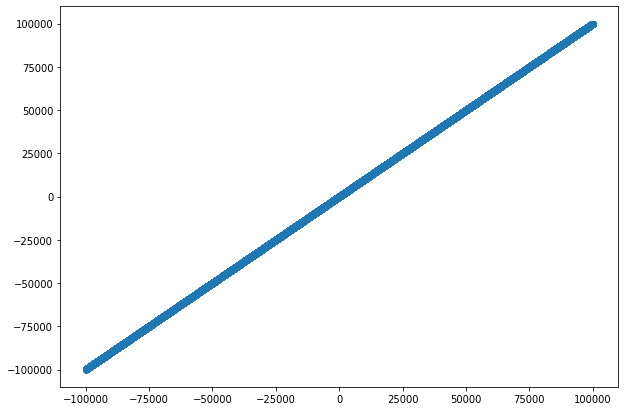

In [16]:
# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train);

### Model 0:

* 3 Layers
* 10 Epochs
* lr = Default

In [20]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_0 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,name='output_layer')]
)

# Compile model
model_0.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)


In [17]:
# Fit the model
history_0 = model_0.fit(
    X_train,
    y_train,
    epochs = 10
)

Epoch 1/10
1172/1172 [==============================] - 3s 2ms/step - loss: 141.2326 - mae: 141.2326
Epoch 2/10
1172/1172 [==============================] - 3s 2ms/step - loss: 125.2258 - mae: 125.2258
Epoch 3/10
1172/1172 [==============================] - 3s 2ms/step - loss: 133.7017 - mae: 133.7017
Epoch 4/10
1172/1172 [==============================] - 3s 2ms/step - loss: 131.3540 - mae: 131.3540
Epoch 5/10
1172/1172 [==============================] - 3s 2ms/step - loss: 120.0610 - mae: 120.0610
Epoch 6/10
1172/1172 [==============================] - 3s 2ms/step - loss: 133.2898 - mae: 133.2898
Epoch 7/10
1172/1172 [==============================] - 3s 3ms/step - loss: 128.1900 - mae: 128.1900
Epoch 8/10
1172/1172 [==============================] - 3s 3ms/step - loss: 136.0108 - mae: 136.0108
Epoch 9/10
1172/1172 [==============================] - 3s 3ms/step - loss: 116.5407 - mae: 116.5407
Epoch 10/10
1172/1172 [==============================] - 3s 3ms/step - loss: 128.7321 - mae

In [23]:
# Predict 
pred_0 = model_0.predict(X_test)

391/391 [==============================] - 1s 1ms/step


In [24]:
# Creating Evaluation Functions

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)
     



In [35]:
# Evaluate

mae_0 = mae(y_test,pred_0.squeeze()).numpy()
mse_0 = mse(y_test,pred_0.squeeze()).numpy()

mae_0,mse_0

(25115.389, 839835100.0)

### Model 1:

* 4 Layers
* 10 Epochs
* lr = Default

In [48]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_1 = tf.keras.Sequential(
    [tf.keras.layers.Dense(10000,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1,name='output_layer')]
)

# Compile model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)


In [49]:
# Fit the model
history_1 = model_1.fit(
    X_train,
    y_train,
    epochs = 50
)

Epoch 1/50
1172/1172 [==============================] - 6s 4ms/step - loss: 4122.5850 - mae: 4122.5850
Epoch 2/50
1172/1172 [==============================] - 5s 4ms/step - loss: 1419.7765 - mae: 1419.7765
Epoch 3/50
1172/1172 [==============================] - 5s 4ms/step - loss: 1229.2854 - mae: 1229.2854
Epoch 4/50
1172/1172 [==============================] - 5s 4ms/step - loss: 1184.9824 - mae: 1184.9824
Epoch 5/50
1172/1172 [==============================] - 5s 4ms/step - loss: 1020.9013 - mae: 1020.9013
Epoch 6/50
1172/1172 [==============================] - 5s 4ms/step - loss: 843.3806 - mae: 843.3806
Epoch 7/50
1172/1172 [==============================] - 5s 4ms/step - loss: 952.2236 - mae: 952.2236
Epoch 8/50
1172/1172 [==============================] - 5s 4ms/step - loss: 724.8158 - mae: 724.8158
Epoch 9/50
1172/1172 [==============================] - 5s 4ms/step - loss: 800.8220 - mae: 800.8220
Epoch 10/50
1172/1172 [==============================] - 5s 4ms/step - loss: 851.

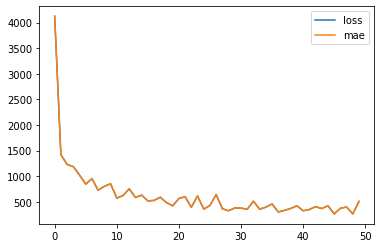

In [50]:
# Plot loss curve
import pandas as pd
pd.DataFrame(history_1.history).plot();

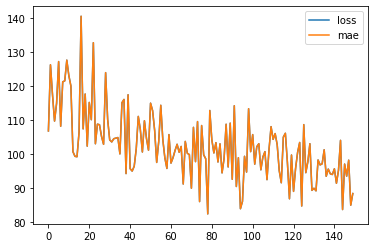

In [47]:
# Plot loss curve
import pandas as pd
pd.DataFrame(history_1.history).plot();

### 1.3 Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [52]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

X = insurance.drop('charges',axis=1)
y  = insurance['charges']

# Build out train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

#Transform trianing and test data with Normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_norm  = ct.transform(X_test)

### Building a basic model

In [54]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance = model_insurance.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [55]:
# Model Evaluation
model_insurance.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5781 - mae: 3171.5781


[3171.578125, 3171.578125]

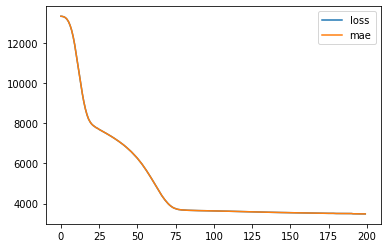

In [57]:
# Performance Visualization
pd.DataFrame(history_insurance.history).plot()

### Model 1: Increasing layers

In [68]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_1 = model_insurance_1.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [69]:
# Model Evaluation
model_insurance_1.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3175.3743 - mae: 3175.3743


[3175.374267578125, 3175.374267578125]

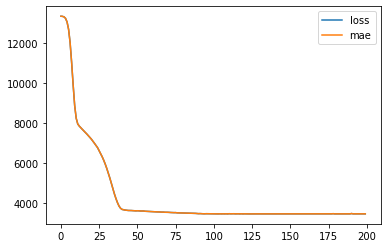

In [70]:
# Performance Visualization
pd.DataFrame(history_insurance_1.history).plot()

### Model 2: Changind the width of the added layer 

In [71]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_2 = model_insurance_2.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [72]:
# Model Evaluation
model_insurance_2.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3183.4041 - mae: 3183.4041


[3183.404052734375, 3183.404052734375]

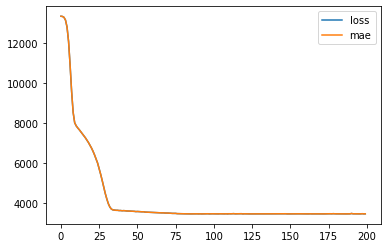

In [73]:
# Performance Visualization
pd.DataFrame(history_insurance_2.history).plot()

### Model 3: Chanding the layer width

In [74]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_3 = model_insurance_3.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [75]:
# Model Evaluation
model_insurance_3.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3173.7439 - mae: 3173.7439


[3173.743896484375, 3173.743896484375]

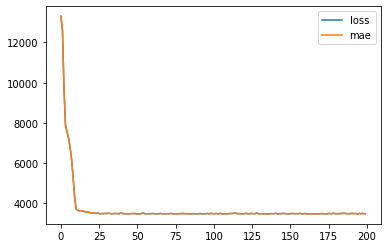

In [76]:
# Performance Visualization
pd.DataFrame(history_insurance_3.history).plot()

### Model 04: Reducing the Learning Rate

Same as model 3 but reducing the learning rate by 10X

In [77]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.0001),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_4 = model_insurance_4.fit(X_train_normal,y_train,epochs=200,verbose=0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [78]:
# Model Evaluation
model_insurance_4.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3252.3174 - mae: 3252.3174


[3252.3173828125, 3252.3173828125]

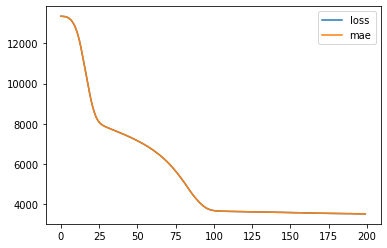

In [79]:
# Performance Visualization
pd.DataFrame(history_insurance_4.history).plot()

### Model 05: Increasing Layer Widths

In [83]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_insurance_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),# Added new layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_insurance_5.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.1),
    metrics = ['mae']
)

# 3. Fit the model
history_insurance_5 = model_insurance_5.fit(X_train_normal,y_train,epochs=200,verbose=0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [84]:
# Model Evaluation
model_insurance_5.evaluate(X_test_norm,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3588.7961 - mae: 3588.7961


[3588.796142578125, 3588.796142578125]

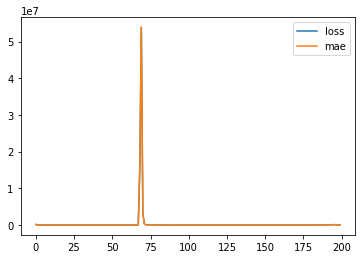

In [85]:
# Performance Visualization
pd.DataFrame(history_insurance_5.history).plot()